# Cardiotocography Classification

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
file_path='CTG.xls'

In [3]:
ctg = pd.read_excel(file_path, sheet_name=1, skiprows=1)

In [4]:
ctg.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


In [5]:
ctg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   b            2126 non-null   float64
 1   e            2126 non-null   float64
 2   AC           2126 non-null   float64
 3   FM           2127 non-null   float64
 4   UC           2127 non-null   float64
 5   DL           2128 non-null   float64
 6   DS           2128 non-null   float64
 7   DP           2128 non-null   float64
 8   DR           2128 non-null   float64
 9   Unnamed: 9   0 non-null      float64
 10  LB           2126 non-null   float64
 11  AC.1         2126 non-null   float64
 12  FM.1         2127 non-null   float64
 13  UC.1         2127 non-null   float64
 14  DL.1         2128 non-null   float64
 15  DS.1         2128 non-null   float64
 16  DP.1         2128 non-null   float64
 17  ASTV         2127 non-null   float64
 18  MSTV         2127 non-null   float64
 19  ALTV  

In [6]:
ctg.drop(ctg.iloc[:,:10], inplace = True, axis = 1) 

In [7]:
ctg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LB           2126 non-null   float64
 1   AC.1         2126 non-null   float64
 2   FM.1         2127 non-null   float64
 3   UC.1         2127 non-null   float64
 4   DL.1         2128 non-null   float64
 5   DS.1         2128 non-null   float64
 6   DP.1         2128 non-null   float64
 7   ASTV         2127 non-null   float64
 8   MSTV         2127 non-null   float64
 9   ALTV         2127 non-null   float64
 10  MLTV         2127 non-null   float64
 11  Width        2126 non-null   float64
 12  Min          2126 non-null   float64
 13  Max          2126 non-null   float64
 14  Nmax         2126 non-null   float64
 15  Nzeros       2126 non-null   float64
 16  Mode         2126 non-null   float64
 17  Mean         2126 non-null   float64
 18  Median       2126 non-null   float64
 19  Varian

In [8]:
ctg.drop(ctg.iloc[:, 21:33], inplace = True, axis = 1)
ctg = ctg.drop(['Unnamed: 44', 'CLASS'], axis = 1)

In [9]:
ctg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC.1      2126 non-null   float64
 2   FM.1      2127 non-null   float64
 3   UC.1      2127 non-null   float64
 4   DL.1      2128 non-null   float64
 5   DS.1      2128 non-null   float64
 6   DP.1      2128 non-null   float64
 7   ASTV      2127 non-null   float64
 8   MSTV      2127 non-null   float64
 9   ALTV      2127 non-null   float64
 10  MLTV      2127 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [10]:
ctg.isnull().sum()

LB          3
AC.1        3
FM.1        2
UC.1        2
DL.1        1
DS.1        1
DP.1        1
ASTV        2
MSTV        2
ALTV        2
MLTV        2
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
NSP         3
dtype: int64

In [11]:
ctg = ctg.dropna()

In [12]:
ctg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC.1      2126 non-null   float64
 2   FM.1      2126 non-null   float64
 3   UC.1      2126 non-null   float64
 4   DL.1      2126 non-null   float64
 5   DS.1      2126 non-null   float64
 6   DP.1      2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [13]:
ctg.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.000000,133.000000,140.000000,160.000000
AC.1,2126.0,0.003170,0.003860,0.0,0.000000,0.001630,0.005631,0.019284
FM.1,2126.0,0.009474,0.046670,0.0,0.000000,0.000000,0.002512,0.480634
UC.1,2126.0,0.004357,0.002940,0.0,0.001876,0.004482,0.006525,0.014925
DL.1,2126.0,0.001885,0.002962,0.0,0.000000,0.000000,0.003264,0.015385
DS.1,2126.0,0.000004,0.000063,0.0,0.000000,0.000000,0.000000,0.001353
DP.1,2126.0,0.000157,0.000580,0.0,0.000000,0.000000,0.000000,0.005348
ASTV,2126.0,46.990122,17.192814,12.0,32.000000,49.000000,61.000000,87.000000
MSTV,2126.0,1.332785,0.883241,0.2,0.700000,1.200000,1.700000,7.000000
ALTV,2126.0,9.846660,18.396880,0.0,0.000000,0.000000,11.000000,91.000000


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='NSP', ylabel='count'>

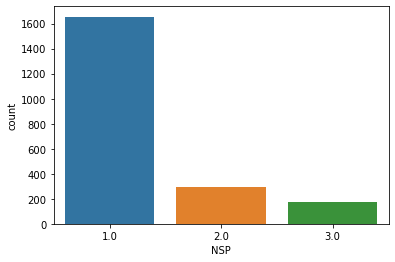

In [15]:
sns.countplot(x='NSP', data=ctg)

<ipython-input-16-3f9b7debed0c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ctg_feature.hist(ax=ax)


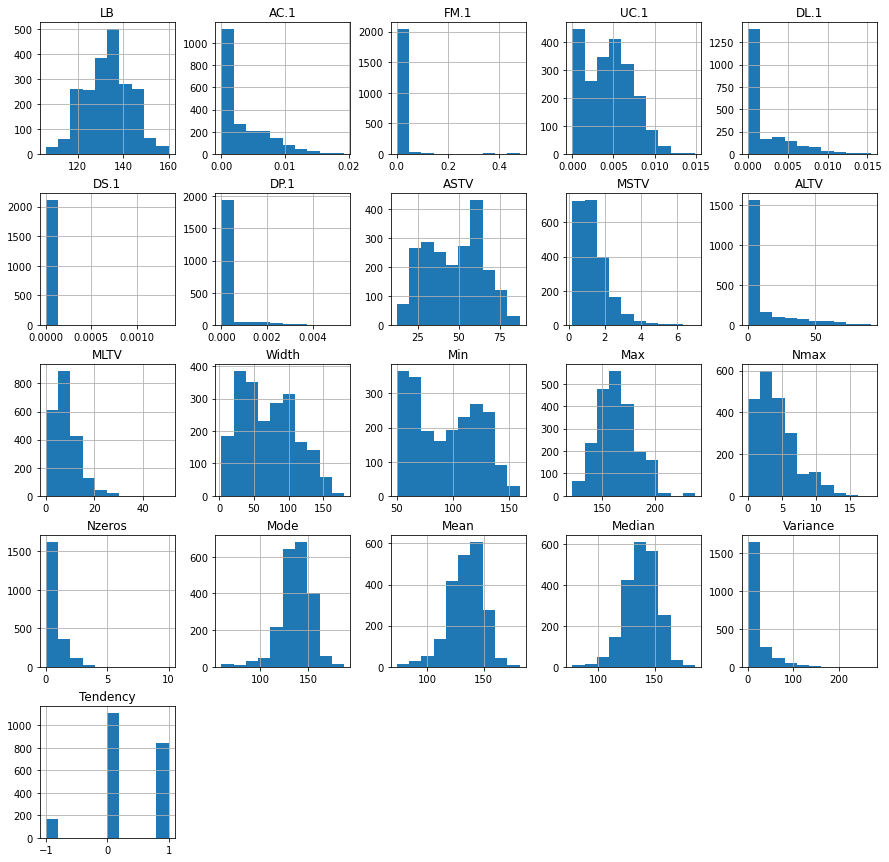

In [16]:
ctg_feature=ctg.drop(columns='NSP')
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ctg_feature.hist(ax=ax)
plt.show()

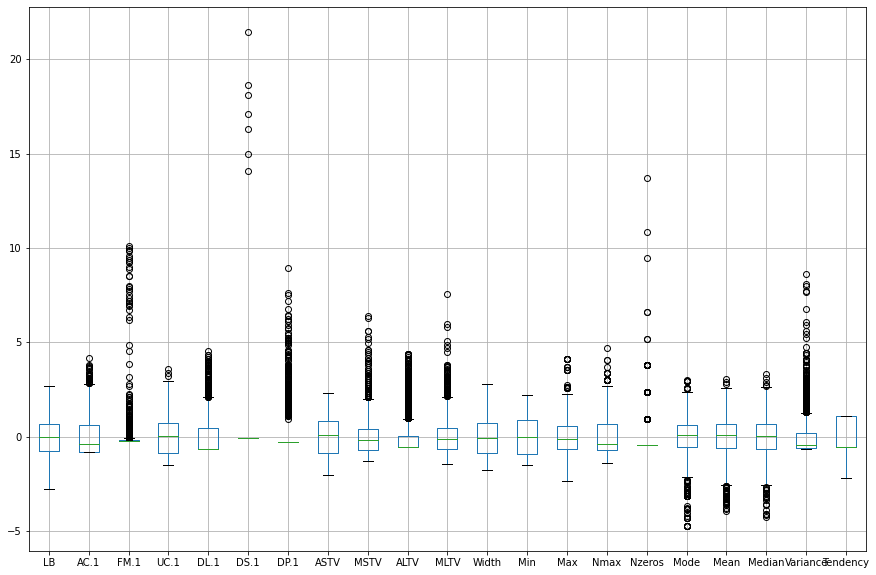

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# scaling feature
ctg_feature_scale = pd.DataFrame(preprocessing.scale(ctg_feature), columns=ctg_feature.columns)
# show box plot
ctg_feature_scale.boxplot(ax=ax)
plt.show()

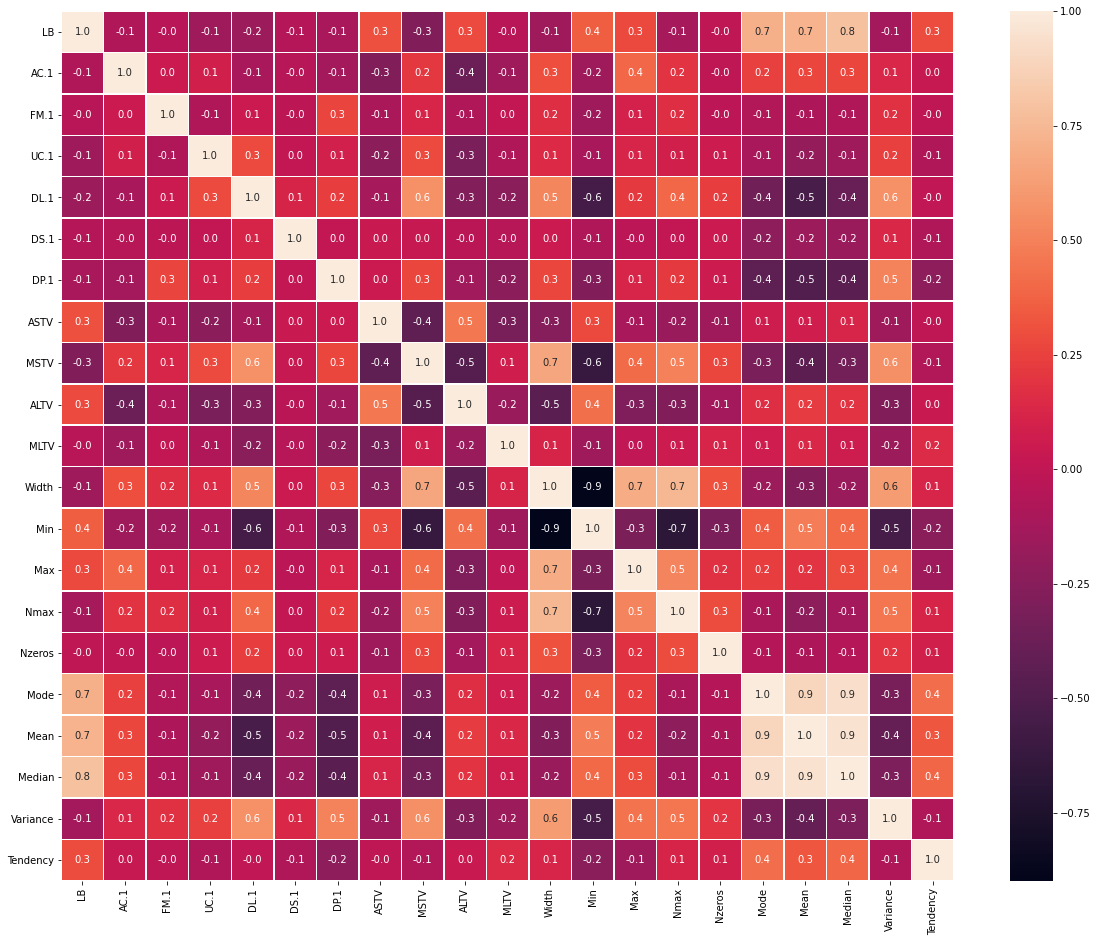

In [18]:
corr = ctg_feature.corr()
f, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

## Data Preprocessing

### Normalization

In [19]:
from sklearn import preprocessing
ctg_num=ctg_feature.drop(['Tendency'], axis = 1)
feature_numpy = ctg_num.values #returns a numpy array
scaler = preprocessing.RobustScaler()
feature_norm = scaler.fit_transform(feature_numpy)
feature_norm = pd.DataFrame(feature_norm)

In [20]:
header=['LB','AC.1','FM.1','UC.1','DL.1','DS.1','DP.1','ASTV','MSTV','ALTV','MLTV','Width','Min','Max', 'Nmax','Nzeros','Mode','Mean','Median','Variance']

In [21]:
feature_norm.columns = header

In [22]:
feature_norm.head()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance
0,-0.928571,-0.289446,0.0,-0.963999,0.000000,0.0,0.0,0.827586,-0.7,3.909091,-0.806452,-0.055556,-0.584906,-1.636364,-0.25,0.0,-1.000000,0.05,-0.947368,3.000000
1,-0.071429,0.843408,0.0,0.408200,0.977347,0.0,0.0,-1.103448,0.9,0.000000,0.483871,0.992063,-0.471698,1.636364,0.75,1.0,0.105263,0.00,0.052632,0.227273
2,0.000000,0.300504,0.0,0.822481,1.017935,0.0,0.0,-1.137931,0.9,0.000000,0.967742,0.992063,-0.471698,1.636364,0.50,1.0,0.105263,-0.05,-0.052632,0.272727
3,0.071429,0.165291,0.0,0.688438,0.784631,0.0,0.0,-1.137931,1.2,0.000000,2.516129,0.785714,-0.754717,0.363636,2.00,0.0,-0.105263,-0.10,-0.105263,0.272727
4,-0.071429,0.867394,0.0,0.787566,0.000000,0.0,0.0,-1.137931,1.2,0.000000,2.016129,0.785714,-0.754717,0.363636,1.50,0.0,-0.105263,0.00,-0.052632,0.181818


In [23]:
feature_norm.tail()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance
2121,0.500000,-0.289446,0.000000,0.633220,0.0,0.0,0.0,1.034483,-1.0,2.272727,-0.032258,-0.436508,0.830189,0.681818,0.25,0.0,0.736842,0.70,0.684211,-0.227273
2122,0.500000,-0.151898,0.000000,0.535482,0.0,0.0,0.0,1.000000,-0.8,2.000000,-0.048387,-0.023810,0.188679,0.318182,0.75,0.0,0.684211,0.60,0.631579,-0.181818
2123,0.500000,-0.115353,0.000000,0.512124,0.0,0.0,0.0,1.034483,-0.8,1.818182,-0.209677,-0.007937,0.188679,0.363636,0.50,0.0,0.736842,0.60,0.684211,-0.136364
2124,0.500000,-0.168893,0.000000,0.350210,0.0,0.0,0.0,1.000000,-0.8,2.454545,-0.064516,-0.023810,0.188679,0.318182,0.75,0.0,0.684211,0.55,0.631579,-0.136364
2125,0.642857,-0.002572,0.643036,0.773418,0.0,0.0,0.0,0.862069,-0.8,3.272727,-0.387097,-0.404762,0.452830,-0.136364,-0.25,1.0,0.315789,0.35,0.315789,-0.272727


In [24]:
feature_all=feature_norm.join(ctg_feature['Tendency'])

In [25]:
feature_all.head()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,-0.928571,-0.289446,0.0,-0.963999,0.000000,0.0,0.0,0.827586,-0.7,3.909091,...,-0.055556,-0.584906,-1.636364,-0.25,0.0,-1.000000,0.05,-0.947368,3.000000,1.0
1,-0.071429,0.843408,0.0,0.408200,0.977347,0.0,0.0,-1.103448,0.9,0.000000,...,0.992063,-0.471698,1.636364,0.75,1.0,0.105263,0.00,0.052632,0.227273,0.0
2,0.000000,0.300504,0.0,0.822481,1.017935,0.0,0.0,-1.137931,0.9,0.000000,...,0.992063,-0.471698,1.636364,0.50,1.0,0.105263,-0.05,-0.052632,0.272727,0.0
3,0.071429,0.165291,0.0,0.688438,0.784631,0.0,0.0,-1.137931,1.2,0.000000,...,0.785714,-0.754717,0.363636,2.00,0.0,-0.105263,-0.10,-0.105263,0.272727,1.0
4,-0.071429,0.867394,0.0,0.787566,0.000000,0.0,0.0,-1.137931,1.2,0.000000,...,0.785714,-0.754717,0.363636,1.50,0.0,-0.105263,0.00,-0.052632,0.181818,1.0


In [26]:
feature_all.tail()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
2121,0.500000,-0.289446,0.000000,0.633220,0.0,0.0,0.0,1.034483,-1.0,2.272727,...,-0.436508,0.830189,0.681818,0.25,0.0,0.736842,0.70,0.684211,-0.227273,0.0
2122,0.500000,-0.151898,0.000000,0.535482,0.0,0.0,0.0,1.000000,-0.8,2.000000,...,-0.023810,0.188679,0.318182,0.75,0.0,0.684211,0.60,0.631579,-0.181818,1.0
2123,0.500000,-0.115353,0.000000,0.512124,0.0,0.0,0.0,1.034483,-0.8,1.818182,...,-0.007937,0.188679,0.363636,0.50,0.0,0.736842,0.60,0.684211,-0.136364,1.0
2124,0.500000,-0.168893,0.000000,0.350210,0.0,0.0,0.0,1.000000,-0.8,2.454545,...,-0.023810,0.188679,0.318182,0.75,0.0,0.684211,0.55,0.631579,-0.136364,1.0
2125,0.642857,-0.002572,0.643036,0.773418,0.0,0.0,0.0,0.862069,-0.8,3.272727,...,-0.404762,0.452830,-0.136364,-0.25,1.0,0.315789,0.35,0.315789,-0.272727,0.0


In [27]:
# Save file to .csv
df_ctg=feature_all.join(ctg['NSP'])
df_ctg.to_csv('ctg.csv',index=False)

## Train-Test Split

In [28]:
X = feature_all
y = ctg['NSP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Feature Selection

In [29]:
# feature selection memakai ANOVA F-test statistic
def select_features_anova(X_train, y_train, X_test,k):
    #configure to select all features
    fs_anova = SelectKBest(score_func=f_classif, k=k)
    #learn relationship from training data
    fs_anova.fit(X_train, y_train)
    #transform train input data
    X_train_anova = fs_anova.transform(X_train)
    #transform test input data
    X_test_anova = fs_anova.transform(X_test)
    return X_train_anova, X_test_anova, fs_anova

In [30]:
# feature selection memakai Mutual Information
def select_features_mi(X_train, y_train, X_test,k):
    #configure to select all features
    fs_mi = SelectKBest(score_func=mutual_info_classif, k=k)
    #learn relationship from training data
    fs_mi.fit(X_train, y_train)
    #transform train input data
    X_train_mi = fs_mi.transform(X_train)
    #transform test input data
    X_test_mi = fs_mi.transform(X_test)
    return X_train_mi, X_test_mi, fs_mi

In [31]:
#define number of feature to evaluate
num_features = [i+1 for i in range(X.shape[1])]
print(num_features)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


### Fit model menggunakan semua feature

In [32]:
model_all = LogisticRegression(solver='liblinear')
model_all.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [33]:
# evaluate the model
yhat_all = model_all.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_all)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 88.50


### Feature Selection menggunakan ANOVA F-test Statistic

In [34]:
X_train_anova, X_test_anova, fs_anova = select_features_anova(X_train, y_train, X_test,'all')

In [35]:
# calculate the score for each feature
for i in range(len(fs_anova.scores_)):
    print('Feature %d: %.3f' % (i, fs_anova.scores_[i]))

Feature 0: 94.721
Feature 1: 151.251
Feature 2: 5.313
Feature 3: 75.307
Feature 4: 57.118
Feature 5: 23.723
Feature 6: 455.785
Feature 7: 281.835
Feature 8: 98.518
Feature 9: 245.337
Feature 10: 58.819
Feature 11: 44.709
Feature 12: 68.895
Feature 13: 1.806
Feature 14: 9.752
Feature 15: 2.926
Feature 16: 230.938
Feature 17: 254.276
Feature 18: 211.995
Feature 19: 124.451
Feature 20: 39.808


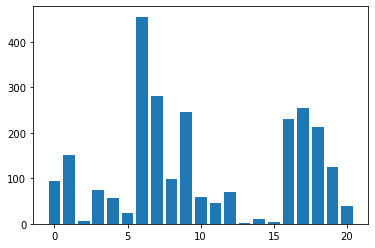

In [36]:
# plot the scores
pyplot.bar([i for i in range(len(fs_anova.scores_))], fs_anova.scores_)
pyplot.show()

In [37]:
results=list()
for num_feature in num_features:
    X_train_anova, X_test_anova, fs_anova = select_features_anova(X_train, y_train, X_test,num_feature)
    model_anova = LogisticRegression(solver='liblinear')
    model_anova.fit(X_train_anova, y_train)
    # evaluate the model
    yhat_anova = model_anova.predict(X_test_anova)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat_anova)
    print('>%d Accuracy: %.2f' % (num_feature, accuracy*100))    

>1 Accuracy: 76.53
>2 Accuracy: 78.17
>3 Accuracy: 81.22
>4 Accuracy: 83.57
>5 Accuracy: 83.80
>6 Accuracy: 83.33
>7 Accuracy: 85.21
>8 Accuracy: 87.09
>9 Accuracy: 87.79
>10 Accuracy: 88.26
>11 Accuracy: 88.50
>12 Accuracy: 88.50
>13 Accuracy: 88.73
>14 Accuracy: 89.20
>15 Accuracy: 88.73
>16 Accuracy: 88.73
>17 Accuracy: 88.73
>18 Accuracy: 88.73
>19 Accuracy: 89.20
>20 Accuracy: 88.26
>21 Accuracy: 88.50


### Feature selection menggunakan Mutual Information

In [38]:
X_train_mi, X_test_mi, fs_mi = select_features_mi(X_train, y_train, X_test,'all')

In [39]:
# calculate the score for each feature
for i in range(len(fs_mi.scores_)):
    print('Feature %d: %.3f' % (i, fs_mi.scores_[i]))

Feature 0: 0.115
Feature 1: 0.134
Feature 2: 0.042
Feature 3: 0.061
Feature 4: 0.065
Feature 5: 0.011
Feature 6: 0.100
Feature 7: 0.203
Feature 8: 0.225
Feature 9: 0.167
Feature 10: 0.075
Feature 11: 0.133
Feature 12: 0.150
Feature 13: 0.064
Feature 14: 0.009
Feature 15: 0.000
Feature 16: 0.149
Feature 17: 0.172
Feature 18: 0.147
Feature 19: 0.139
Feature 20: 0.012


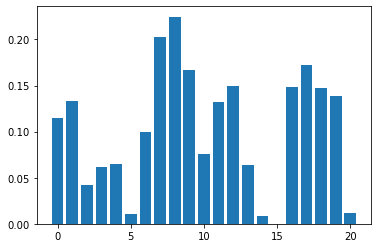

In [40]:
# plot the scores
pyplot.bar([i for i in range(len(fs_mi.scores_))], fs_mi.scores_)
pyplot.show()


In [41]:
results=list()
for num_feature in num_features:
    X_train_mi, X_test_mi, fs_mi = select_features_mi(X_train, y_train, X_test,num_feature)
    model_mi = LogisticRegression(solver='liblinear')
    model_mi.fit(X_train_mi, y_train)
    # evaluate the model
    yhat_mi = model_mi.predict(X_test_mi)
    # evaluate predictions
    accuracy_mi = accuracy_score(y_test, yhat_mi)
    print('>%d Accuracy: %.2f' % (num_feature, accuracy_mi*100))    

>1 Accuracy: 78.17
>2 Accuracy: 78.40
>3 Accuracy: 80.05
>4 Accuracy: 83.10
>5 Accuracy: 83.33
>6 Accuracy: 83.80
>7 Accuracy: 86.15
>8 Accuracy: 84.04
>9 Accuracy: 86.38
>10 Accuracy: 87.79
>11 Accuracy: 88.03
>12 Accuracy: 88.03
>13 Accuracy: 88.03
>14 Accuracy: 88.97
>15 Accuracy: 88.97
>16 Accuracy: 88.50
>17 Accuracy: 88.50
>18 Accuracy: 87.56
>19 Accuracy: 89.20
>20 Accuracy: 89.20
>21 Accuracy: 88.50


### Feature Selection menggunakan ANOVA F-test Statistic (Cross validation)

In [42]:
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
    scores= cross_val_score(model,X_train,y_train,scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
def evaluate_model_sel(model):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
    scores= cross_val_score(model,X_train_sel,y_train,scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [43]:
#enumerate each number of features
results_anova=list()
for num_feature in num_features:
    #create pipeline
    model_anova = LogisticRegression(solver='liblinear')
    fs_anova=SelectKBest(score_func=f_classif,k=num_feature)
    pipeline_anova=Pipeline(steps=[('anova',fs_anova),('lr',model_anova)])
    #evaluate the model
    scores_anova=evaluate_model(pipeline_anova)
    results_anova.append(scores_anova)
    #summarize the results
    print('>%d %.3f (%.6f)' % (num_feature, np.mean(scores_anova),np.std(scores_anova)))

>1 0.782 (0.001019)
>2 0.793 (0.005830)
>3 0.814 (0.008399)
>4 0.841 (0.023610)
>5 0.842 (0.018025)
>6 0.845 (0.011330)
>7 0.853 (0.012792)
>8 0.872 (0.011964)
>9 0.871 (0.010646)
>10 0.878 (0.013136)
>11 0.884 (0.015641)
>12 0.887 (0.014423)
>13 0.888 (0.014916)
>14 0.887 (0.014435)
>15 0.890 (0.015968)
>16 0.889 (0.016582)
>17 0.889 (0.016522)
>18 0.889 (0.015153)
>19 0.890 (0.013981)
>20 0.889 (0.016144)
>21 0.889 (0.015603)


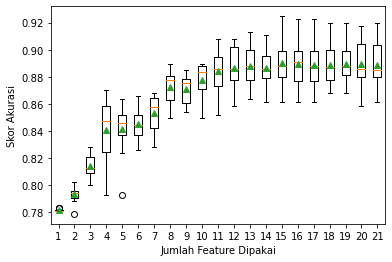

In [44]:
# plot model performance for comparison
pyplot.boxplot(results_anova, labels=num_features, showmeans=True)
plt.xlabel("Jumlah Feature Dipakai")
plt.ylabel("Skor Akurasi")
pyplot.show()

hasil terbaik adalah k = 19

### Feature Selection menggunakan Mutual Information (Cross validation)

In [45]:
#enumerate each number of features
results_mi=list()
for num_feature in num_features:
    #create pipeline
    model_mi = LogisticRegression(solver='liblinear')
    fs_mi=SelectKBest(score_func=mutual_info_classif,k=num_feature)
    pipeline_mi=Pipeline(steps=[('mi',fs_mi),('lr',model_mi)])
    #evaluate the model
    scores_mi=evaluate_model(pipeline_mi)
    results_mi.append(scores_mi)
    #summarize the results
    print('>%d %.3f (%.6f)' % (num_feature, np.mean(scores_mi),np.std(scores_mi)))

>1 0.782 (0.001301)
>2 0.798 (0.007305)
>3 0.816 (0.016666)
>4 0.843 (0.015680)
>5 0.845 (0.013361)
>6 0.848 (0.013210)
>7 0.853 (0.008821)
>8 0.861 (0.012555)
>9 0.870 (0.008977)
>10 0.873 (0.010887)
>11 0.878 (0.013183)
>12 0.880 (0.012904)
>13 0.881 (0.013258)
>14 0.888 (0.016949)
>15 0.885 (0.016998)
>16 0.891 (0.016652)
>17 0.889 (0.015514)
>18 0.890 (0.016112)
>19 0.891 (0.016029)
>20 0.890 (0.015558)
>21 0.889 (0.015603)


hasil terbaik adalah k = 19

In [46]:
X_train_sel, X_test_sel, fs_sel = select_features_mi(X_train, y_train, X_test,19)

In [47]:
X_train_sel.shape

(1700, 19)

In [48]:
X_test_sel.shape

(426, 19)

In [49]:
fs_19=SelectKBest(score_func=mutual_info_classif,k=19)
fs_19.fit(X_train, y_train)
print(fs_19.get_support(indices=True))

[ 0  1  2  3  4  6  7  8  9 10 11 12 13 15 16 17 18 19 20]


## Train Model

###  <span style='color:red'> KNN (All Feature) </span>

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### Validation Accuracy 

In [51]:
accuracy_knn_val=list()
n_range = range(1, 51)
for n in n_range :
    knn = KNeighborsClassifier(n_neighbors=n)
    #evaluate the model
    scores=evaluate_model(knn)
    accuracy_knn_val.append(np.mean(scores)*100)
    #summarize the results
    print('n_neighbors= %d , Accuracy = %.3f (%.6f)' % (n, np.mean(scores)*100,np.std(scores)))

n_neighbors= 1 , Accuracy = 90.059 (0.011289)
n_neighbors= 2 , Accuracy = 89.255 (0.010966)
n_neighbors= 3 , Accuracy = 89.549 (0.007652)
n_neighbors= 4 , Accuracy = 88.941 (0.010697)
n_neighbors= 5 , Accuracy = 89.118 (0.006235)
n_neighbors= 6 , Accuracy = 88.471 (0.008538)
n_neighbors= 7 , Accuracy = 88.353 (0.009582)
n_neighbors= 8 , Accuracy = 88.020 (0.009532)
n_neighbors= 9 , Accuracy = 88.157 (0.010754)
n_neighbors= 10 , Accuracy = 87.961 (0.009598)
n_neighbors= 11 , Accuracy = 87.784 (0.006477)
n_neighbors= 12 , Accuracy = 87.667 (0.007712)
n_neighbors= 13 , Accuracy = 87.471 (0.009220)
n_neighbors= 14 , Accuracy = 87.647 (0.008347)
n_neighbors= 15 , Accuracy = 87.451 (0.008663)
n_neighbors= 16 , Accuracy = 87.412 (0.010368)
n_neighbors= 17 , Accuracy = 87.373 (0.008663)
n_neighbors= 18 , Accuracy = 87.373 (0.013287)
n_neighbors= 19 , Accuracy = 87.275 (0.012505)
n_neighbors= 20 , Accuracy = 87.157 (0.011861)
n_neighbors= 21 , Accuracy = 86.980 (0.013287)
n_neighbors= 22 , Accu

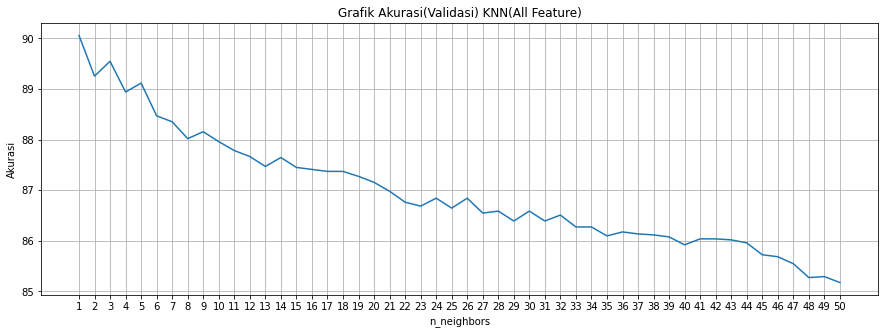

In [52]:
#plot grafik perbandingan akurasi
plt.figure(figsize=(15,5)) 
plt.plot(n_range,accuracy_knn_val)
plt.xticks(range(1,51))
plt.title('Grafik Akurasi(Validasi) KNN(All Feature)')
plt.xlabel('n_neighbors')
plt.ylabel('Akurasi')
plt.grid()

Dipilih parameter n_neighbors = 1

# 

#### Test Score

In [53]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train, y_train)
# evaluate the model
yhat_knn = model_knn.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_knn)
precision = precision_score(y_test, yhat_knn,average='macro')
recall = recall_score(y_test, yhat_knn,average='macro')
f1 =  f1_score(y_test, yhat_knn,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f  ' % (precision*100))
print('Recall: %.3f  ' % (recall*100))
print('F1 Score: %.3f  ' % (f1*100))

Accuracy: 90.376 
Precision: 85.331  
Recall: 80.085  
F1 Score: 82.405  


Text(33.0, 0.5, 'True Value')

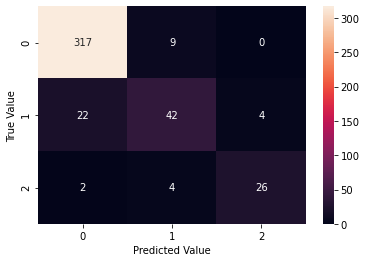

In [54]:
matrix_knn=confusion_matrix(y_test, yhat_knn)
sns.heatmap(matrix_knn, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

###  <span style='color:red'> KNN (Selected Feature) </span>

#### Validation Accuracy

In [55]:
accuracy_knn_val=list()
n_range = range(1, 51)
for n in n_range :
    knn = KNeighborsClassifier(n_neighbors=n)
    #evaluate the model
    scores=evaluate_model_sel(knn)
    accuracy_knn_val.append(np.mean(scores)*100)
    #summarize the results
    print('n_neighbors= %d , Accuracy = %.3f (%.6f)' % (n, np.mean(scores)*100,np.std(scores)))

n_neighbors= 1 , Accuracy = 90.020 (0.015710)
n_neighbors= 2 , Accuracy = 89.176 (0.012151)
n_neighbors= 3 , Accuracy = 89.647 (0.010435)
n_neighbors= 4 , Accuracy = 89.235 (0.010484)
n_neighbors= 5 , Accuracy = 89.451 (0.006287)
n_neighbors= 6 , Accuracy = 88.647 (0.009660)
n_neighbors= 7 , Accuracy = 88.686 (0.007890)
n_neighbors= 8 , Accuracy = 88.255 (0.009676)
n_neighbors= 9 , Accuracy = 88.137 (0.009676)
n_neighbors= 10 , Accuracy = 88.020 (0.009237)
n_neighbors= 11 , Accuracy = 87.902 (0.008670)
n_neighbors= 12 , Accuracy = 87.765 (0.007921)
n_neighbors= 13 , Accuracy = 87.490 (0.009104)
n_neighbors= 14 , Accuracy = 87.608 (0.009330)
n_neighbors= 15 , Accuracy = 87.608 (0.008502)
n_neighbors= 16 , Accuracy = 87.275 (0.011221)
n_neighbors= 17 , Accuracy = 87.235 (0.008381)
n_neighbors= 18 , Accuracy = 87.275 (0.014391)
n_neighbors= 19 , Accuracy = 87.235 (0.013555)
n_neighbors= 20 , Accuracy = 87.196 (0.014034)
n_neighbors= 21 , Accuracy = 87.059 (0.012707)
n_neighbors= 22 , Accu

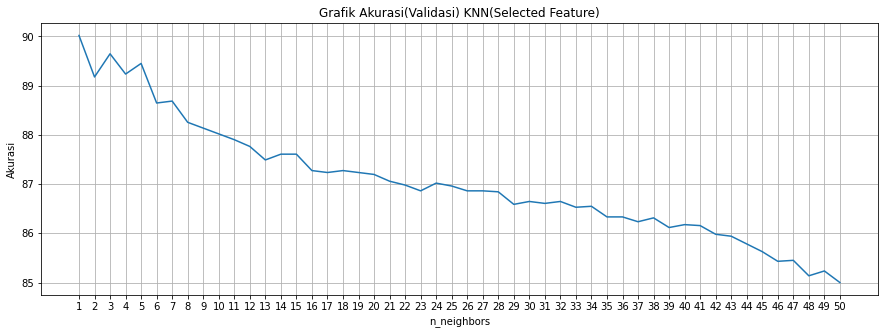

In [56]:
#plot grafik perbandingan akurasi
plt.figure(figsize=(15,5)) 
plt.plot(n_range,accuracy_knn_val)
plt.xticks(range(1,51))
plt.title('Grafik Akurasi(Validasi) KNN(Selected Feature)')
plt.xlabel('n_neighbors')
plt.ylabel('Akurasi')
plt.grid()

Dipilih parameter n_neighbors = 1

#### Test Score

In [57]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train_sel, y_train)
# evaluate the model
yhat_knn = model_knn.predict(X_test_sel)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_knn)
precision = precision_score(y_test, yhat_knn,average='macro')
recall = recall_score(y_test, yhat_knn,average='macro')
f1 =  f1_score(y_test, yhat_knn,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f  ' % (precision*100))
print('Recall: %.3f  ' % (recall*100))
print('F1 Score: %.3f  ' % (f1*100))

Accuracy: 90.376 
Precision: 85.087  
Recall: 81.576  
F1 Score: 83.068  


Text(33.0, 0.5, 'True Value')

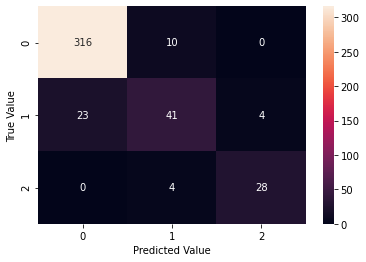

In [58]:
matrix_knn=confusion_matrix(y_test, yhat_knn)
sns.heatmap(matrix_knn, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

###  <span style='color:red'> Decision Tree (All Feature) </span>

In [59]:
from sklearn.tree import DecisionTreeClassifier

#### Validation Accuracy 

In [60]:
accuracy_tree_val=list()
n_range = range(1, 51)
for n in n_range :
    tree = DecisionTreeClassifier(criterion='entropy',max_depth=n,random_state=1)
    #evaluate the model
    scores=evaluate_model(tree)
    accuracy_tree_val.append(np.mean(scores)*100)
    #summarize the results
    print('max_depth= %d , Accuracy = %.3f (%.6f)' % (n, np.mean(scores)*100,np.std(scores)))

max_depth= 1 , Accuracy = 78.373 (0.006405)
max_depth= 2 , Accuracy = 84.863 (0.011008)
max_depth= 3 , Accuracy = 89.706 (0.010831)
max_depth= 4 , Accuracy = 90.941 (0.008456)
max_depth= 5 , Accuracy = 91.608 (0.009859)
max_depth= 6 , Accuracy = 92.412 (0.008044)
max_depth= 7 , Accuracy = 92.098 (0.006755)
max_depth= 8 , Accuracy = 92.078 (0.009622)
max_depth= 9 , Accuracy = 92.255 (0.008289)
max_depth= 10 , Accuracy = 92.216 (0.008006)
max_depth= 11 , Accuracy = 92.216 (0.009676)
max_depth= 12 , Accuracy = 92.059 (0.010080)
max_depth= 13 , Accuracy = 92.137 (0.009483)
max_depth= 14 , Accuracy = 92.235 (0.010166)
max_depth= 15 , Accuracy = 92.314 (0.010668)
max_depth= 16 , Accuracy = 92.314 (0.010668)
max_depth= 17 , Accuracy = 92.314 (0.010668)
max_depth= 18 , Accuracy = 92.314 (0.010668)
max_depth= 19 , Accuracy = 92.314 (0.010668)
max_depth= 20 , Accuracy = 92.314 (0.010668)
max_depth= 21 , Accuracy = 92.314 (0.010668)
max_depth= 22 , Accuracy = 92.314 (0.010668)
max_depth= 23 , Acc

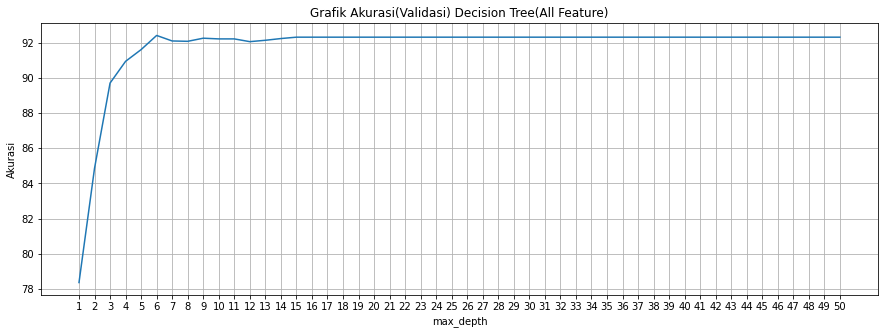

In [61]:
#plot grafik perbandingan akurasi
plt.figure(figsize=(15,5)) 
plt.plot(n_range,accuracy_tree_val)
plt.xticks(range(1,51))
plt.title('Grafik Akurasi(Validasi) Decision Tree(All Feature)')
plt.xlabel('max_depth')
plt.ylabel('Akurasi')
plt.grid()

Dipilih parameter max_depth = 6

#### Test Score

In [62]:
model_tree = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=1)
model_tree.fit(X_train, y_train)
# evaluate the model
yhat_tree = model_tree.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_tree)
precision = precision_score(y_test, yhat_tree,average='macro')
recall = recall_score(y_test, yhat_tree,average='macro')
f1 =  f1_score(y_test, yhat_tree,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f  ' % (precision*100))
print('Recall: %.3f  ' % (recall*100))
print('F1 Score: %.3f  ' % (f1*100))

Accuracy: 92.019 
Precision: 91.390  
Recall: 83.619  
F1 Score: 86.520  


Text(33.0, 0.5, 'True Value')

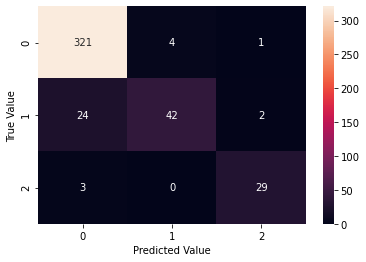

In [63]:
matrix_tree=confusion_matrix(y_test, yhat_tree)
sns.heatmap(matrix_tree, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

###  <span style='color:red'> Decision Tree (Selected Feature) </span>

#### Validation Accuracy

In [64]:
accuracy_tree_val=list()
n_range = range(1, 51)
for n in n_range :
    tree = DecisionTreeClassifier(criterion='entropy',max_depth=n,random_state=1)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
    #evaluate the model
    scores=evaluate_model_sel(tree)
    accuracy_tree_val.append(np.mean(scores)*100)
    #summarize the results
    print('max_depth= %d , Accuracy = %.3f (%.6f)' % (n, np.mean(scores)*100,np.std(scores)))

max_depth= 1 , Accuracy = 78.373 (0.006405)
max_depth= 2 , Accuracy = 84.863 (0.011008)
max_depth= 3 , Accuracy = 89.784 (0.011384)
max_depth= 4 , Accuracy = 91.020 (0.009550)
max_depth= 5 , Accuracy = 91.588 (0.008705)
max_depth= 6 , Accuracy = 92.235 (0.007188)
max_depth= 7 , Accuracy = 92.275 (0.007242)
max_depth= 8 , Accuracy = 91.941 (0.008758)
max_depth= 9 , Accuracy = 92.373 (0.012688)
max_depth= 10 , Accuracy = 92.314 (0.009379)
max_depth= 11 , Accuracy = 92.000 (0.011243)
max_depth= 12 , Accuracy = 92.137 (0.011938)
max_depth= 13 , Accuracy = 92.137 (0.012356)
max_depth= 14 , Accuracy = 92.137 (0.012796)
max_depth= 15 , Accuracy = 92.176 (0.012892)
max_depth= 16 , Accuracy = 92.176 (0.012892)
max_depth= 17 , Accuracy = 92.176 (0.012892)
max_depth= 18 , Accuracy = 92.176 (0.012892)
max_depth= 19 , Accuracy = 92.176 (0.012892)
max_depth= 20 , Accuracy = 92.176 (0.012892)
max_depth= 21 , Accuracy = 92.176 (0.012892)
max_depth= 22 , Accuracy = 92.176 (0.012892)
max_depth= 23 , Acc

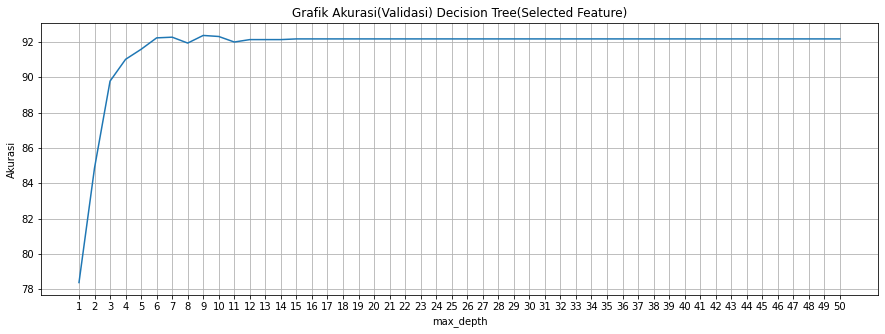

In [65]:
#plot grafik perbandingan akurasi                                 
plt.figure(figsize=(15,5))                                                                                                                                                                                                                                                                                                                                                                                                                                             
plt.plot(n_range,accuracy_tree_val)
plt.xticks(range(1,51))
plt.title('Grafik Akurasi(Validasi) Decision Tree(Selected Feature)')
plt.xlabel('max_depth')
plt.ylabel('Akurasi')
plt.grid()

Dipilih parameter max_depth = 6

#### Test Score

In [66]:
model_tree = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=1)
model_tree.fit(X_train_sel, y_train)
# evaluate the model
yhat_tree = model_tree.predict(X_test_sel)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_tree)
precision = precision_score(y_test, yhat_tree,average='macro')
recall = recall_score(y_test, yhat_tree,average='macro')
f1 =  f1_score(y_test, yhat_tree,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f  ' % (precision*100))
print('Recall: %.3f  ' % (recall*100))
print('F1 Score: %.3f  ' % (f1*100))

Accuracy: 92.254 
Precision: 92.074  
Recall: 83.721  
F1 Score: 86.790  


Text(33.0, 0.5, 'True Value')

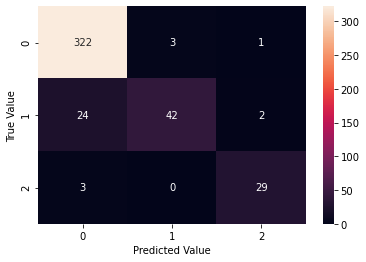

In [67]:
matrix_tree=confusion_matrix(y_test, yhat_tree)
sns.heatmap(matrix_tree, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

###  <span style='color:red'> Random Forest (All Feature) </span>

In [68]:
from sklearn.ensemble import RandomForestClassifier

#### Validation Accuracy

In [69]:
accuracy_forest_val=list()
n_range = range(1, 51)
for n in n_range :
    forest = RandomForestClassifier(criterion='entropy',max_depth=n,random_state=1)
    #evaluate the model
    scores=evaluate_model(forest)
    accuracy_forest_val.append(np.mean(scores)*100)
    #summarize the results
    print('max_depth= %d , Accuracy = %.3f (%.6f)' % (n, np.mean(scores)*100,np.std(scores)))

max_depth= 1 , Accuracy = 78.255 (0.002623)
max_depth= 2 , Accuracy = 84.745 (0.015573)
max_depth= 3 , Accuracy = 89.667 (0.010455)
max_depth= 4 , Accuracy = 91.196 (0.008932)
max_depth= 5 , Accuracy = 91.824 (0.009418)
max_depth= 6 , Accuracy = 92.706 (0.007804)
max_depth= 7 , Accuracy = 93.216 (0.009453)
max_depth= 8 , Accuracy = 93.824 (0.008758)
max_depth= 9 , Accuracy = 94.196 (0.008170)
max_depth= 10 , Accuracy = 94.275 (0.008502)
max_depth= 11 , Accuracy = 94.098 (0.009336)
max_depth= 12 , Accuracy = 94.137 (0.009723)
max_depth= 13 , Accuracy = 94.157 (0.008899)
max_depth= 14 , Accuracy = 94.118 (0.009558)
max_depth= 15 , Accuracy = 94.098 (0.009085)
max_depth= 16 , Accuracy = 94.176 (0.008966)
max_depth= 17 , Accuracy = 94.157 (0.009054)
max_depth= 18 , Accuracy = 94.098 (0.009035)
max_depth= 19 , Accuracy = 94.118 (0.009011)
max_depth= 20 , Accuracy = 94.118 (0.009011)
max_depth= 21 , Accuracy = 94.118 (0.009011)
max_depth= 22 , Accuracy = 94.118 (0.009011)
max_depth= 23 , Acc

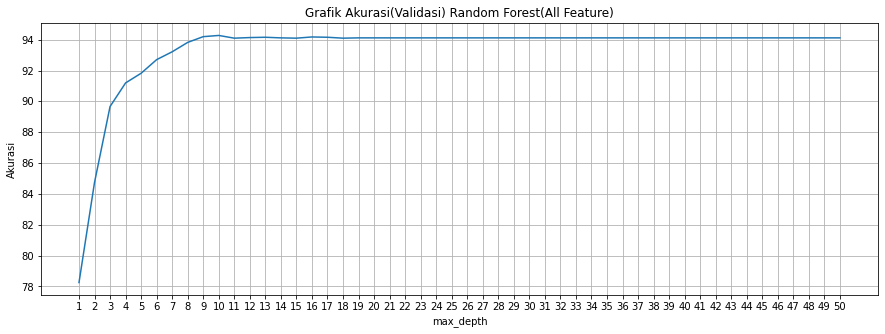

In [70]:
#plot grafik perbandingan akurasi
plt.figure(figsize=(15,5)) 
plt.plot(n_range,accuracy_forest_val)
plt.xticks(range(1,51))
plt.title('Grafik Akurasi(Validasi) Random Forest(All Feature)')
plt.xlabel('max_depth')
plt.ylabel('Akurasi')
plt.grid()

Dipilh paramater max_depth= 10

#### Test Score

In [71]:
model_forest = RandomForestClassifier(criterion='entropy',max_depth=10,random_state=1)
model_forest.fit(X_train, y_train)
# evaluate the model
yhat_forest = model_forest.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_forest)
precision = precision_score(y_test, yhat_forest,average='macro')
recall = recall_score(y_test, yhat_forest,average='macro')
f1 =  f1_score(y_test, yhat_forest,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f  ' % (precision*100))
print('Recall: %.3f  ' % (recall*100))
print('F1 Score: %.3f  ' % (f1*100))

Accuracy: 93.192 
Precision: 90.883  
Recall: 83.803  
F1 Score: 86.827  


Text(33.0, 0.5, 'True Value')

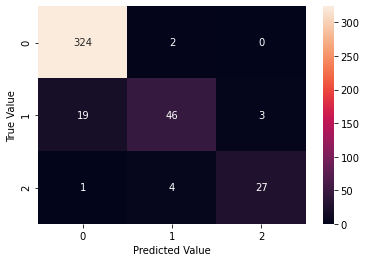

In [72]:
matrix_forest=confusion_matrix(y_test, yhat_forest)
sns.heatmap(matrix_forest, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

###  <span style='color:red'> Random Forest (Selected Feature) </span>

#### Validation Accuracy

In [73]:
accuracy_forest_val=list()
n_range = range(1, 51)
for n in n_range :
    forest = RandomForestClassifier(criterion='entropy',max_depth=n,random_state=1)
    #evaluate the model
    scores=evaluate_model_sel(forest)
    accuracy_forest_val.append(np.mean(scores)*100)
    #summarize the results
    print('max_depth= %d , Accuracy = %.3f (%.6f)' % (n, np.mean(scores)*100,np.std(scores)))

max_depth= 1 , Accuracy = 78.176 (0.001019)
max_depth= 2 , Accuracy = 85.725 (0.015939)
max_depth= 3 , Accuracy = 90.059 (0.008705)
max_depth= 4 , Accuracy = 91.314 (0.009532)
max_depth= 5 , Accuracy = 92.078 (0.008873)
max_depth= 6 , Accuracy = 92.843 (0.007592)
max_depth= 7 , Accuracy = 93.490 (0.009525)
max_depth= 8 , Accuracy = 94.059 (0.007067)
max_depth= 9 , Accuracy = 94.196 (0.009379)
max_depth= 10 , Accuracy = 94.373 (0.007407)
max_depth= 11 , Accuracy = 94.157 (0.007305)
max_depth= 12 , Accuracy = 94.373 (0.008723)
max_depth= 13 , Accuracy = 94.333 (0.007948)
max_depth= 14 , Accuracy = 94.255 (0.007407)
max_depth= 15 , Accuracy = 94.333 (0.007531)
max_depth= 16 , Accuracy = 94.294 (0.007692)
max_depth= 17 , Accuracy = 94.216 (0.007281)
max_depth= 18 , Accuracy = 94.235 (0.007347)
max_depth= 19 , Accuracy = 94.235 (0.007347)
max_depth= 20 , Accuracy = 94.235 (0.007347)
max_depth= 21 , Accuracy = 94.235 (0.007347)
max_depth= 22 , Accuracy = 94.235 (0.007347)
max_depth= 23 , Acc

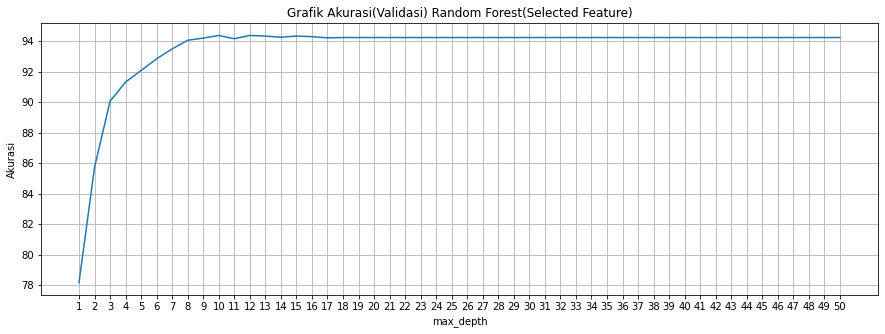

In [74]:
#plot grafik perbandingan akurasi
plt.figure(figsize=(15,5)) 
plt.plot(n_range,accuracy_forest_val)
plt.xticks(range(1,51))
plt.title('Grafik Akurasi(Validasi) Random Forest(Selected Feature)')
plt.xlabel('max_depth')
plt.ylabel('Akurasi')
plt.grid()

Dipilih parameter max_depth=10

#### Test Score

In [75]:
model_forest = RandomForestClassifier(criterion='entropy',max_depth=10,random_state=1)
model_forest.fit(X_train_sel, y_train)
# evaluate the model
yhat_forest = model_forest.predict(X_test_sel)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_forest)
precision = precision_score(y_test, yhat_forest,average='macro')
recall = recall_score(y_test, yhat_forest,average='macro')
f1 =  f1_score(y_test, yhat_forest,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f  ' % (precision*100))
print('Recall: %.3f  ' % (recall*100))
print('F1 Score: %.3f  ' % (f1*100))

Accuracy: 93.427 
Precision: 91.149  
Recall: 85.232  
F1 Score: 87.760  


Text(33.0, 0.5, 'True Value')

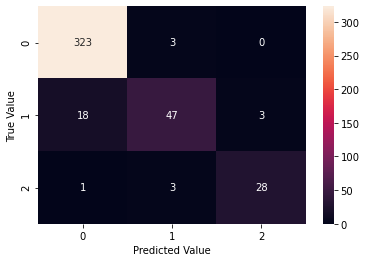

In [76]:
matrix_forest=confusion_matrix(y_test, yhat_forest)
sns.heatmap(matrix_forest, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

###  <span style='color:red'> Naive Bayes (All Feature) </span>

In [77]:
from sklearn.naive_bayes import GaussianNB

#### Validation Accuracy

In [78]:
nb = GaussianNB()
#evaluate the model
scores=evaluate_model(nb)
#summarize the results
print('Accuracy = %.3f (%.6f)' % (np.mean(scores)*100,np.std(scores)))

Accuracy = 81.431 (0.014487)


#### Test Score

In [79]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
# evaluate the model
yhat_nb = model_nb.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_nb)
precision = precision_score(y_test, yhat_nb,average='macro')
recall = recall_score(y_test, yhat_nb,average='macro')
f1 =  f1_score(y_test, yhat_nb,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f  ' % (precision*100))
print('Recall: %.3f  ' % (recall*100))
print('F1 Score: %.3f  ' % (f1*100))

Accuracy: 84.038 
Precision: 72.140  
Recall: 75.464  
F1 Score: 72.232  


Text(33.0, 0.5, 'True Value')

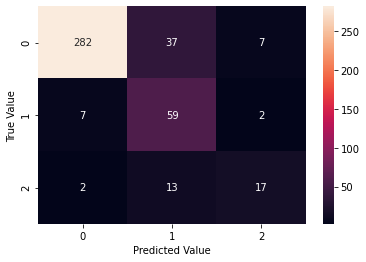

In [80]:
matrix_nb=confusion_matrix(y_test, yhat_nb)
sns.heatmap(matrix_nb, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

###  <span style='color:red'> Naive Bayes (Selected Feature) </span>

#### Validation Accuracy

In [81]:
nb = GaussianNB()
#evaluate the model
scores=evaluate_model_sel(nb)
#summarize the results
print('Accuracy = %.3f (%.6f)' % (np.mean(scores)*100,np.std(scores)))

Accuracy = 81.529 (0.014425)


#### Test Score

In [82]:
model_nb = GaussianNB()
model_nb.fit(X_train_sel, y_train)
# evaluate the model
yhat_nb = model_nb.predict(X_test_sel)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_nb)
precision = precision_score(y_test, yhat_nb,average='macro')
recall = recall_score(y_test, yhat_nb,average='macro')
f1 =  f1_score(y_test, yhat_nb,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f  ' % (precision*100))
print('Recall: %.3f  ' % (recall*100))
print('F1 Score: %.3f  ' % (f1*100))

Accuracy: 83.803 
Precision: 71.329  
Recall: 75.362  
F1 Score: 71.843  


Text(33.0, 0.5, 'True Value')

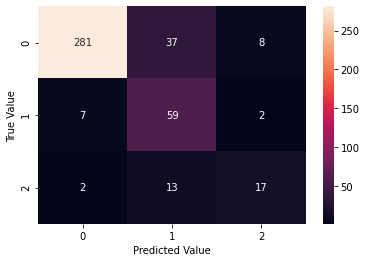

In [83]:
matrix_nb=confusion_matrix(y_test, yhat_nb)
sns.heatmap(matrix_nb, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

###  <span style='color:red'> Logistic Regression (All Feature) </span>

#### Validation Accuracy

In [84]:
accuracy_logistic_val=list()
solver = ['newton-cg','liblinear','sag','saga']
for n in solver :
    lr = LogisticRegression(solver=n)
    #evaluate the model
    scores=evaluate_model(lr)
    accuracy_logistic_val.append(scores)
    #summarize the results
    print('Solver= %s , Accuracy = %.3f (%.6f)' % (n, np.mean(scores)*100,np.std(scores)))

Solver= newton-cg , Accuracy = 89.353 (0.012892)
Solver= liblinear , Accuracy = 88.902 (0.015603)
Solver= sag , Accuracy = 86.824 (0.014505)
Solver= saga , Accuracy = 86.333 (0.010673)


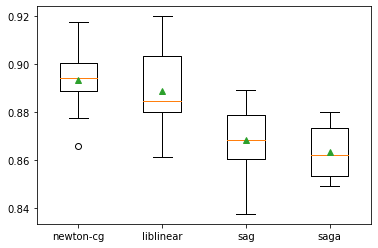

In [85]:
# plot model performance for comparison
pyplot.boxplot(accuracy_logistic_val, labels=solver, showmeans=True)
pyplot.show()

#### Test Score

In [86]:
model_lr = LogisticRegression(solver='newton-cg')
model_lr.fit(X_train, y_train)
# evaluate the model
yhat_lr = model_lr.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_lr)
precision = precision_score(y_test, yhat_lr,average='macro')
recall = recall_score(y_test, yhat_lr,average='macro')
f1 =  f1_score(y_test, yhat_lr,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f  ' % (precision*100))
print('Recall: %.3f  ' % (recall*100))
print('F1 Score: %.3f  ' % (f1*100))

Accuracy: 88.967 
Precision: 79.532  
Recall: 78.593  
F1 Score: 79.032  


Text(33.0, 0.5, 'True Value')

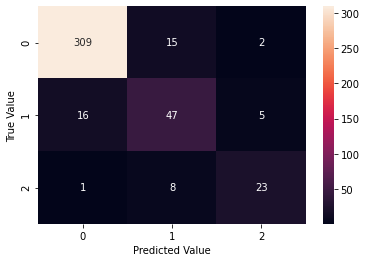

In [87]:
matrix_lr=confusion_matrix(y_test, yhat_lr)
sns.heatmap(matrix_lr, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

###  <span style='color:red'> Logistic Regression (Selected Feature) </span>

#### Validation Accuracy

In [88]:
accuracy_logistic_val=list()
solver = ['newton-cg','liblinear','sag','saga']
for n in solver :
    lr = LogisticRegression(solver=n)
    #evaluate the model
    scores=evaluate_model_sel(lr)
    accuracy_logistic_val.append(scores)
    #summarize the results
    print('Solver= %s , Accuracy = %.3f (%.6f)' % (n, np.mean(scores)*100,np.std(scores)))

Solver= newton-cg , Accuracy = 89.529 (0.014134)
Solver= liblinear , Accuracy = 89.098 (0.016368)
Solver= sag , Accuracy = 86.824 (0.014183)
Solver= saga , Accuracy = 86.392 (0.010646)


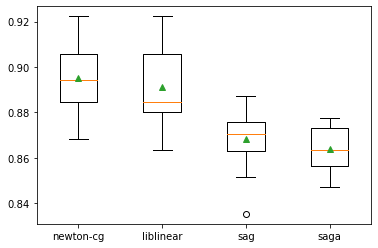

In [89]:
# plot model performance for comparison
pyplot.boxplot(accuracy_logistic_val, labels=solver, showmeans=True)
pyplot.show()

#### Test Score

In [90]:
model_lr = LogisticRegression(solver='newton-cg')
model_lr.fit(X_train_sel, y_train)
# evaluate the model
yhat_lr = model_lr.predict(X_test_sel)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_lr)
precision = precision_score(y_test, yhat_lr,average='macro')
recall = recall_score(y_test, yhat_lr,average='macro')
f1 =  f1_score(y_test, yhat_lr,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f  ' % (precision*100))
print('Recall: %.3f  ' % (recall*100))
print('F1 Score: %.3f  ' % (f1*100))

Accuracy: 89.202 
Precision: 79.861  
Recall: 78.695  
F1 Score: 79.251  


Text(33.0, 0.5, 'True Value')

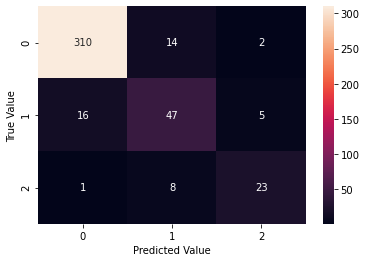

In [91]:
matrix_lr=confusion_matrix(y_test, yhat_lr)
sns.heatmap(matrix_lr, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

###  <span style='color:red'> Support Vector Machine(All Feature) </span>

#### Validation Accuracy

In [92]:
from sklearn.svm import SVC

In [93]:
accuracy_svm_val=list()
kernel = ['linear','poly','rbf','sigmoid']
for n in kernel:
    svm = SVC(kernel=n, gamma='scale', probability=True, random_state=1)
    #evaluate the model
    scores=evaluate_model(svm)
    accuracy_svm_val.append(scores)
    #summarize the results
    print('Kernel= %s , Accuracy = %.3f (%.6f)' % (n, np.mean(scores)*100,np.std(scores)))

Kernel= linear , Accuracy = 89.804 (0.012719)
Kernel= poly , Accuracy = 78.471 (0.003658)
Kernel= rbf , Accuracy = 84.176 (0.013758)
Kernel= sigmoid , Accuracy = 81.392 (0.021788)


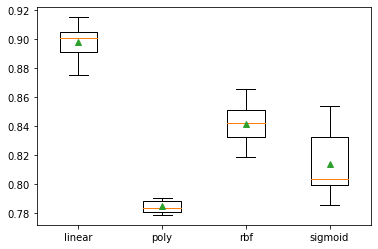

In [94]:
# plot model performance for comparison
pyplot.boxplot(accuracy_svm_val, labels=kernel, showmeans=True)
pyplot.show()

#### Test Score

In [95]:
model_svm = SVC(kernel='linear', gamma='scale', probability=True, random_state=1)
model_svm.fit(X_train, y_train)
# evaluate the model
yhat_svm = model_svm.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_svm)
precision = precision_score(y_test, yhat_svm,average='macro')
recall = recall_score(y_test, yhat_svm,average='macro')
f1 =  f1_score(y_test, yhat_svm,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f  ' % (precision*100))
print('Recall: %.3f  ' % (recall*100))
print('F1 Score: %.3f  ' % (f1*100))

Accuracy: 89.437 
Precision: 80.102  
Recall: 80.349  
F1 Score: 80.141  


Text(33.0, 0.5, 'True Value')

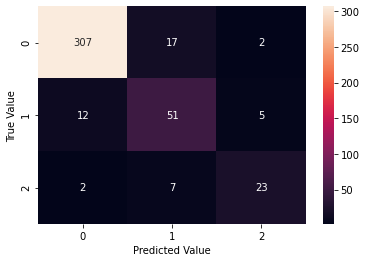

In [96]:
matrix_svm=confusion_matrix(y_test, yhat_svm)
sns.heatmap(matrix_svm, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

###  <span style='color:red'> Support Vector Machine(Selected Feature) </span>

#### Validation Accuracy

In [97]:
accuracy_svm_val=list()
kernel = ['linear','poly','rbf','sigmoid']
for n in kernel:
    svm = SVC(kernel=n, gamma='scale', probability=True, random_state=1)
    #evaluate the model
    scores=evaluate_model_sel(svm)
    accuracy_svm_val.append(scores)
    #summarize the results
    print('Kernel= %s , Accuracy = %.3f (%.6f)' % (n, np.mean(scores)*100,np.std(scores)))

Kernel= linear , Accuracy = 89.863 (0.014487)
Kernel= poly , Accuracy = 78.529 (0.003610)
Kernel= rbf , Accuracy = 84.216 (0.012904)
Kernel= sigmoid , Accuracy = 81.588 (0.021674)


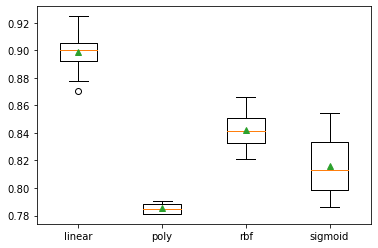

In [98]:
# plot model performance for comparison
pyplot.boxplot(accuracy_svm_val, labels=kernel, showmeans=True)
pyplot.show()

#### Test Score

In [99]:
model_svm = SVC(kernel='linear', gamma='scale', probability=True, random_state=1)
model_svm.fit(X_train_sel, y_train)
# evaluate the model
yhat_svm = model_svm.predict(X_test_sel)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat_svm)
precision = precision_score(y_test, yhat_svm,average='macro')
recall = recall_score(y_test, yhat_svm,average='macro')
f1 =  f1_score(y_test, yhat_svm,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f ' % (precision*100))
print('Recall: %.3f ' % (recall*100))
print('F1 Score: %.3f ' % (f1*100))

Accuracy: 88.732 
Precision: 79.042 
Recall: 78.327 
F1 Score: 78.584 


Text(33.0, 0.5, 'True Value')

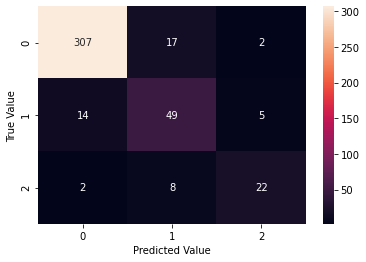

In [106]:
matrix_svm=confusion_matrix(y_test, yhat_svm)
sns.heatmap(matrix_svm, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")